In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
outpath = '/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/EDA/'

In [3]:
path_bioasq  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/bioasq/test_bioasq9b.json'
path_squad  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/squad/test_squad.json'
# path_emrqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/emrqa/datasets/relation-dev.json'
# path_emrqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/emrqa/test_emrqa.json'
# path_cpgqa_fold1  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/otquad/test_otquad_fold_1.json'
# path_cpgqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/otquad/otquad.json'


In [4]:
# path_bioasq  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/bioasq/train_bioasq9b.json'
path_tr_squad  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/squad/train_squad.json'
# path_emrqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/squad/test_squad.json'
path_emrqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/emrqa/datasets/relation-train.json'


# # path_emrqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/emrqa/test_emrqa.json'
# # path_cpgqa  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/otquad/otquad.json'


In [5]:
squ = json.load(open(path_squad))
bio = json.load(open(path_bioasq))
emr = json.load(open(path_emrqa))
squtr = json.load(open(path_tr_squad))
# cpg = json.load(open(path_cpgqa))
# cpg_fold1 = json.load(open(path_cpgqa_fold1))


In [6]:
print(len(np.unique([x['context'] for x in squ['data'][0]['paragraphs']])))
print(len(np.unique([x['context'] for x in bio['data'][0]['paragraphs']])))
print(len(emr['data']))

54
930
296


In [7]:
# k=0
# for x in bio['data']:
#   k+=len(x['paragraphs'][0]['qas'])

In [8]:
# k

In [9]:
# squ['data'][0]
# # ['paragraphs'][0]['context']

In [10]:
# k=0
# cont = []
# for x in squ['data']:
#   k+=len(x['paragraphs'])
#   for y in x['paragraphs']:
#     cont.append(y['context'])
# #     k+=len(y['qas'])

In [11]:
# k

In [12]:
# len(np.unique(cont))

In [13]:
# list(set([x['title'] for x in cpg['data']]))

In [14]:
# new_title = {'Discussion of Recommendations: Risk Mitigation: Recommendation':'Recommendations',
#  'Discussion of Recommendations: Risk Mitigation: Discussion: Written Informed Consent and Opioid Treatment Agreements \n':'Recommendations',
#  'Discussion of Recommendations: Opioid Therapy for Acute Pain: Discussion':'Recommendations',
#  'Discussion of Recommendations: Risk Mitigation: Discussion: Prescribing of Naloxone Rescue and Accompanying Education':'Recommendations',
#  'Discussion of Recommendations: Opioid Therapy for Acute Pain: Recommendation':'Recommendations',
#  'Recommendations':'Recommendations',
#  'About this Clinical Practice Guideline: Shared Decision Making': 'Specifications',
#  'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendation \n':'Recommendations',
#  'Introduction' : 'Introduction',
#  'Discussion of Recommendations: Risk Mitigation: Discussion: Other Risk Mitigation Strategies':'Recommendations',
#  'Paradigm Shift in Pain and Its Treatment':'Background',
#  'Discussion of Recommendations: Type, Dose, Duration, Follow-up, and Taper of Opioids: Recommendations':'Recommendations',
#  'Epidemiology and Impact: General Population':'Background',
#  'Discussion of Recommendations: Risk Mitigation: Discussion':'Recommendations',
#  'About this Clinical Practice Guideline: Methods': 'Specifications',
#  'Opioid Epidemic':'Background',
#  'Discussion of Recommendations: Initiation and Continuation of Opioids: Discussion \n':'Recommendations',
#  'Module C: Tapering or Discontinuation of Opioid Therapy': 'Algorithm',
#  'Discussion of Recommendations: Type, Dose, Duration, Follow-up, and Taper of Opioids: Discussion':'Recommendations',
#  'Discussion of Recommendations: Risk Mitigation: Discussion: State Prescription Drug Monitoring Programs':'Recommendations',
#  'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendations \n':'Recommendations',
#  'How to Use This Clinical Practice Guideline': 'Introduction',
#  'Chronic Pain and Co-occurring Conditions ':'Background',
#  'Discussion of Recommendations: Risk Mitigation: Discussion: Patients at High Risk for Opioid Use Disorder':'Recommendations',
#  'Module A: Determination of Appropriateness for Opioid Therapy': 'Algorithm',
#  'Risk Factors for Adverse Outcomes of Opioid Therapy ':'Background',
#  'Taxonomy':'Background',
#  'About this Clinical Practice Guideline': 'Specifications',
#  'About this Clinical Practice Guideline: Patient-centered Care': 'Specifications',
#  'Pain Management Opioid Taper Decision Tool': 'Specifications',
#  'Prioritizing Safe Opioid Prescribing Practices and Use ':'Background',
#  'Discussion of Recommendations: Initiation and Continuation of Opioids: Discussion':'Recommendations',
#  'Significant Risk Factors':'Background',
#  'About this Clinical Practice Guideline: Clinical Decision Support Tools': 'Specifications',
#  'Qualifying Statements':'Introduction',
#  'Module D: Patients Currently on Opioid Therapy': 'Algorithm',
#  'Mental health disorders':'Background',
#  'Discussion of Recommendations: Risk Mitigation: Discussion: Urine Drug Testing and Confirmatory Testing':'Recommendations',
#  'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendation':'Recommendations',
#  'About this Clinical Practice Guideline: Scope of this Clinical Practice Guideline': 'Specifications',
#  'Algorithm': 'Algorithm',
#  'Module B: Treatment with Opioid Therapy': 'Algorithm',
#  'About this Clinical Practice Guideline: Highlighted Features of this Clinical Practice Guideline': 'Specifications',
#  'Epidemiology and Impact: VA/DoD Population ': 'Background'}


In [15]:
# set(list(new_title.values()))

In [16]:
# df = pd.DataFrame()
# df['title_old'] = [x['title'] for x in cpg['data']]
# df['id'] = [x['paragraphs'][0]['qas'][0]['id'] for x in cpg['data']]
# df['title'] = df['title_old'].map(new_title)
# df['title'].value_counts()

In [17]:
# df

In [18]:
# bio_contexts  = []
# for d in bio['data']:
#   for p in d['paragraphs']:
#     bio_contexts.append(p['context'])
    
# print(len(bio_contexts))
# print(len(np.unique(bio_contexts)))

In [19]:
emr_contexts  = []
for d in emr['data']:
  for p in d['paragraphs']:
    emr_contexts.append(p['context'])
    
print(len(emr_contexts))
print(len(np.unique(emr_contexts)))

296
296


In [20]:
squ_contexts  = []
for d in squ['data']:
  for p in d['paragraphs']:
    squ_contexts.append(p['context'])
    
print(len(squ_contexts))
print(len(np.unique(squ_contexts)))

2067
2067


In [21]:
squtr_contexts  = []
for d in squtr['data']:
  for p in d['paragraphs']:
    squtr_contexts.append(p['context'])
    
print(len(squtr_contexts))
print(len(np.unique(squtr_contexts)))

18896
18891


In [98]:
df_squ = pd.DataFrame()
df_emr = pd.DataFrame()
df_squtr = pd.DataFrame()

df_squ['contents'] = np.unique(squ_contexts)
df_squ['labels'] = [1]*df_squ.shape[0]
df_squ['Domain'] = ['Wikipedia Articles (Train)']*df_squ.shape[0]

df_emr['contents'] = np.unique(emr_contexts)
df_emr['labels'] = [3]*df_emr.shape[0]
df_emr['Domain'] = ['Clinical Notes (Test)']*df_emr.shape[0]

df_squtr['contents'] = np.unique(squtr_contexts)
df_squtr['labels'] = [2]*df_squtr.shape[0]
df_squtr['Domain'] = ['Wikipedia Articles (Test)']*df_squtr.shape[0]

import random
seed = 42
random.seed(seed)
df_squ = df_squ.sample(296)#df_emr.shape[0])
df_emr = df_emr.sample(296)#df_emr.shape[0])
df_squtr = df_squtr.sample(296)#df_emr.shape[0])

#df_emr.shape[0])

In [99]:
df_squ.shape, df_emr.shape

((296, 3), (296, 3))

In [100]:
df = pd.DataFrame()
df = df.append(df_squ)
df = df.append(df_squtr)
df = df.append(df_emr)


In [101]:
# df

In [102]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = .95,
    max_features = 1_000_000,
    stop_words = 'english'
)
tfidf.fit(df.contents)
text = tfidf.transform(df.contents)

In [103]:
# from sklearn.feature_extraction.text import CountVectorizer
# tf = CountVectorizer()
# tf.fit(df.contents)
# text = tf.transform(df.contents)

In [104]:
# make predictions using pca with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset


In [105]:
# def find_optimal_clusters(data, max_k):
#     iters = range(2, max_k+1, 1)
    
#     sse = []
#     for k in iters:
#         sse.append(MiniBatchKMeans(n_clusters=k, random_state=20).fit(data).inertia_)
#         print('Fit {} clusters'.format(k))
        
#     f, ax = plt.subplots(1, 1)
#     ax.plot(iters, sse, marker='o')
#     ax.set_xlabel('Cluster Centers')
#     ax.set_xticks(iters)
#     ax.set_xticklabels(iters)
#     ax.set_ylabel('SSE')
#     ax.set_title('SSE by Cluster Center Plot')
    
# find_optimal_clusters(text, 8)

In [106]:
# clusters = MiniBatchKMeans(n_clusters=2, random_state=20).fit_predict(text)


In [107]:
# def plot_tsne_pca(data, labels):
#     max_label = max(labels)
#     print(max_label)
#     max_items = list(range(data.shape[0])) 
# #     np.random.choice(range(data.shape[0]), size=4189, replace=False)
    
#     pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
#     tsne = TSNE().fit_transform(PCA().fit_transform(data[max_items,:].todense()))
    
    
#     idx = np.random.choice(range(pca.shape[0]), size=84, replace=False)
#     label_subset = labels[max_items]
#     label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
#     f, ax = plt.subplots(1, 1, figsize=(14, 6))
    
#     plot = ax.scatter(pca[idx, 0], pca[idx, 1], c=label_subset, label=label_subset)
#     ax.set_title('PCA Cluster Plot')

    
# #     ax.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
# #     ax.set_title('TSNE Cluster Plot')
    
# # plot_tsne_pca(text, clusters)

# plot_tsne_pca(text, df['labels'].values)


In [108]:
from sklearn.decomposition import PCA
import scipy
import seaborn as sns

pca = PCA()
X = scipy.sparse.csr_matrix.toarray(text)
Xt = pca.fit_transform(X)

y = df['labels'].values
df['PCA Component-1'] = list(Xt[:,0])
df['PCA Component-2'] = list(Xt[:,1])


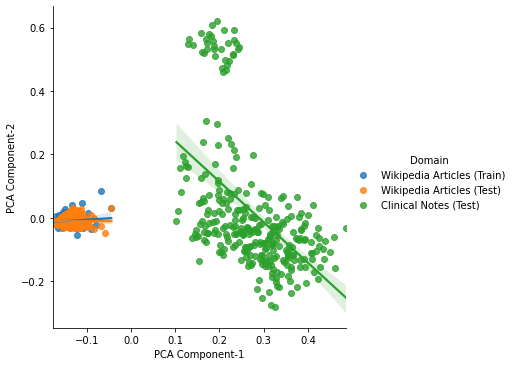

In [109]:

g = sns.lmplot(
    x="PCA Component-1", 
    y="PCA Component-2", 
    hue="Domain", 
    data=df,  
    legend=True
)

<Figure size 432x360 with 0 Axes>

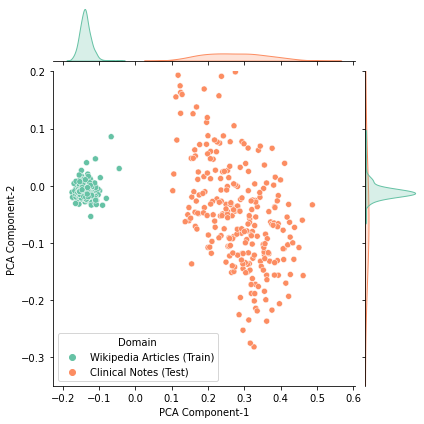

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
# g = sns.lmplot(
#     x="Component-1", 
#     y="Component-2", 
#     hue="label_names", 
#     data=df,  
#     legend=False
# )

dff = df[df['Domain']!='Wikipedia Articles (Test)']
# dff = df[df['Domain']!='Clinical Notes (Test)']
# dff = dff[dff['Domain']!='Wikipedia Articles (Test)']

sns.jointplot(data=dff,
                x='PCA Component-1',
                y='PCA Component-2',
                kind='scatter',
              palette = 'Set2',
#                 rug=True,
#                 fill=True,
                hue='Domain',
#                 xlim=(-.19, -.05),
#                 ylim=(-.05,.05),
#                 xlim=(-.2,.5),
                ylim=(-.35,.2),
#                 fill=False,
#                 color=sns.color_palette('BuPu'),
#                 height=5,
#                 aspect=1.2,
#                 legend=False
               )
# g.ax_marg_x.remove()
# g.ax_marg_y.remove()

# plt.legend(loc='upper left',
#            labels=['Wikipedia Articles', 'Clinical Notes']
#           )
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# plt.legend(bbox_to_anchor=(.1, .45))
# g.add_legend(bbox_to_anchor=(.1, .9), loc="upper left", borderaxespad=0.)

# # plt.scatter
# sns.scatterplot(data=dff,
#                 x='Component-1',
#                 y='Component-2',
# #                 kind='kde',
#               palette = 'Set2',
# #                 rug=True,
# #                 fill=True,
#                 hue='Domain',
# #                 xlim=(-.19, -.05),
# #                 ylim=(-.05,.05),
# #                 xlim=(-.2,.5),
# #                 ylim=(-.35,.7),
# #                 fill=False,
# #                 color=sns.color_palette('BuPu'),
# #                 height=6,
# #                 aspect=1,
# #                 legend_out=False
#                )

# plt.xlim(-.22,.5)
# plt.ylim(-.3,.4)
# plt.xlim(-.22,0.1)
# plt.ylim(-.2,0.1)
# plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PCA Component-1', fontsize=12)
plt.ylabel('PCA Component-2', fontsize=12)

plt.show()



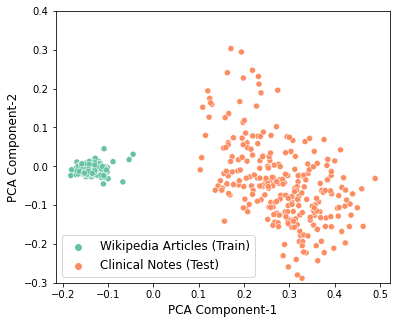

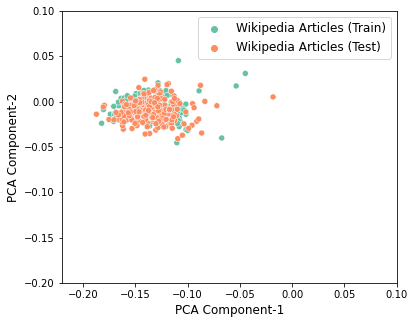

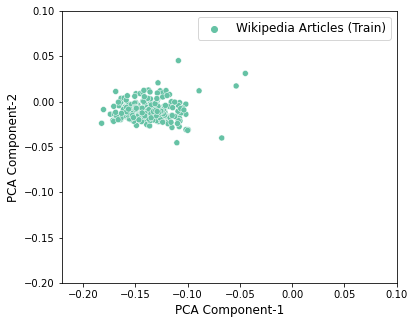

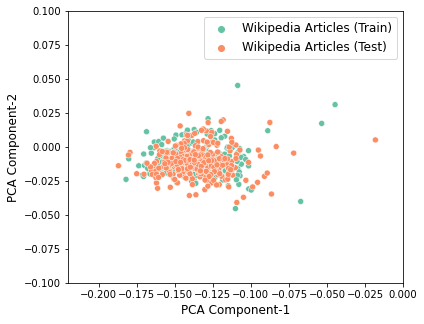

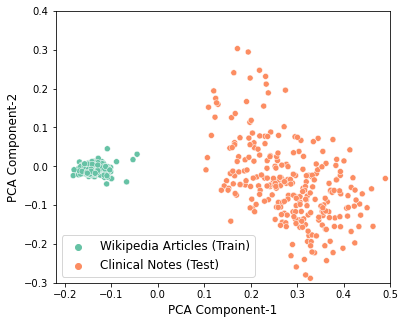

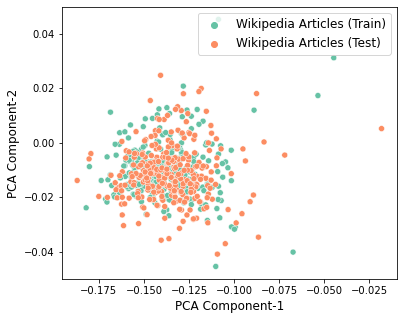

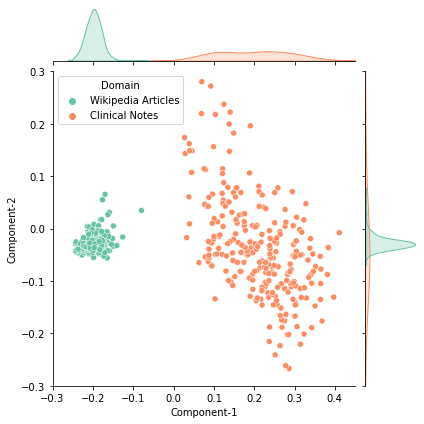

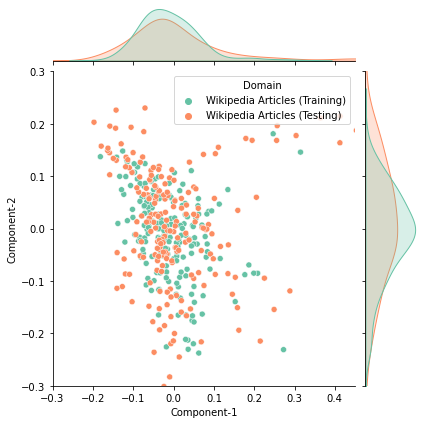